# Machine Learning
## Principal Component Analysis
#### Tutor: Josue Daniel Rodriguez Quintana. [rodriguez@uni-hildesheim.de](mailto:rodriguez@uni-hildesheim.de?subject=ML-Precourse-WS20/21)
##### February 2021
<center>
<b>
Information Systems and Machine Learning Lab<br>
University of Hildesheim<br>
</b>
<br>
<br>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Universit%C3%A4t_Hildesheim_logo.svg/1200px-Universit%C3%A4t_Hildesheim_logo.svg.png" height="10%" width="10%">
</center>

## As in Tutorial 8, load the iris dataset via sklearn.datasets.load_iris and construct a 3:1 training-test split via sklearn.model_selection.train_test_split; use 2020 as the random seed for part A and B.

Compute the principal components usingonly the training data. What is the transformation fromthe old features to the new features?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import decomposition

### Reading the dataset

In [2]:
dataset = load_iris()
X, Y = dataset['data'], dataset['target']
data_split = train_test_split(X, Y, test_size=0.25, random_state=2020)
Xtrain, Xtest, Ytrain, Ytest = data_split

### A. Compute the principal components using only the training data. What is the transformation from the old features to the new features?

In [3]:
N = 2
pca = decomposition.PCA(n_components=N)
pca.fit(Xtrain)
XtrainPCA = pca.transform(Xtrain)
XtrainPCA[:10]

array([[ 3.36859182,  0.49590743],
       [-2.79964274,  0.22087094],
       [-2.6562005 ,  0.12045243],
       [-2.67762069,  0.26878154],
       [ 1.87344851,  0.06995028],
       [-2.66660437, -0.16504718],
       [-2.73277474,  0.06430806],
       [-0.2198681 , -0.72898286],
       [-2.89468421,  0.02545266],
       [ 1.31399441, -0.82583489]])

In [4]:
Ytrain = Ytrain.reshape(-1,1)
XY = np.hstack([XtrainPCA,Ytrain]) #Put them together.

colNames = [f'component_{i}' for i in range(N)]
colNames.append('y')

df_ = pd.DataFrame(data = XY, columns = colNames)
df_

,component_0,component_1,y
0,3.368592,0.495907,2.0
1,-2.799643,0.220871,0.0
2,-2.656200,0.120452,0.0
3,-2.677621,0.268782,0.0
4,1.873449,0.069950,2.0
...,...,...,...
115,0.859661,-0.083157,1.0
116,3.768307,0.200321,2.0
117,0.205250,-0.382240,1.0
118,2.111235,0.092158,2.0


### B. Make a plot ofthe whole dataset, using the first two principal components. (from part 2A)dataset

In [5]:
categoriesDic = {v: k for v, k in enumerate(dataset.target_names)}
categoriesDic

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

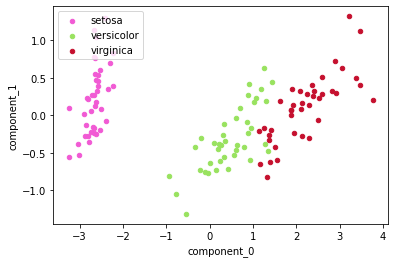

In [6]:
def plot2DPCA(df_,categories):
    """ Plot the first two principal components. """    
    fig, ax = plt.subplots()
    
    grouped = df_.groupby('y')
    
    for key, group in grouped:
        g = group[['component_0','component_1']]
        g.plot(ax=ax, kind='scatter', x='component_0', y='component_1', label=categories[key],color=np.random.rand(3,).reshape(1,-1) )
    
    plt.legend(loc="upper left")
    
plot2DPCA(df_,categoriesDic)

### C. For $k= 1,2,3$ train two linear classifiers (you can use sklearn’s LogisticRegression): one on the original data, and one on the embedded data. Compare their performance by computing the mean and standard deviation of the test accuracy over 1000 independent runs for each classifier.

In [7]:
from sklearn.linear_model import LogisticRegression
np.random.seed() #Restarting our random function.

K = [0,1,2,3]
runs = 1000
test_accuracy_mean = []
test_accuracy_std = []
names =[]

for k in K:
    acc_list = []
    for r in range(runs):
        
        if k>0:
            pca = decomposition.PCA(n_components= k)
            pca.fit(Xtrain)
            XtrainPCA = pca.transform(Xtrain)
            #Evaluation
            XtestPCA = pca.transform(Xtest)
        else:
            XtrainPCA = Xtrain
            XtestPCA = Xtest
            
            
        model_PCA = LogisticRegression().fit(XtrainPCA,Ytrain.ravel())
        
        acc_list.append( model_PCA.score(XtestPCA, Ytest.ravel()) )
    
    acc_list = np.array(acc_list)
    if(k==0):
        name = "Original data"
    else:
        name = "k="+str(k)
    
    names.append(name)
    test_accuracy_mean.append(acc_list.mean())
    test_accuracy_std.append(acc_list.std())
        
print(names)        
print("Mean accuracy:")
print(test_accuracy_mean)
print("Standard deviation:")
print(test_accuracy_std)

['Original data', 'k=1', 'k=2', 'k=3']
Mean accuracy:
[0.8666666666666669, 0.8666666666666669, 0.9000000000000002, 0.8333333333333335]
Standard deviation:
[2.220446049250313e-16, 2.220446049250313e-16, 2.220446049250313e-16, 1.1102230246251565e-16]


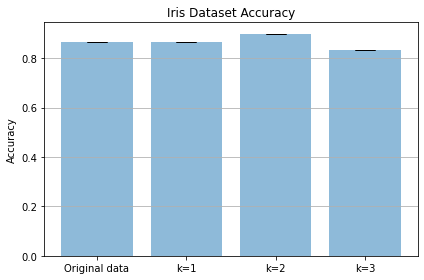

In [8]:
def plotresults(mean, std,labels):
    # Build the plot
    x_pos = np.arange(len(labels))
    fig, ax = plt.subplots()
    ax.bar(x_pos, mean,
           yerr=std,
           align='center',
           alpha=0.5,
           ecolor='black',
           capsize=10)
    ax.set_ylabel('Accuracy')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(labels)
    ax.set_title('Iris Dataset Accuracy')
    ax.yaxis.grid(True)


    # Save the figure and show
    plt.tight_layout()
    #plt.savefig('bar_plot_with_error_bars.png')
    plt.show()
    
plotresults(test_accuracy_mean, test_accuracy_std,names) 

### References

- Gaël Varoquaux, PCA example with Iris Data-set, retrieved from: https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html
- Error Bars, https://problemsolvingwithpython.com/06-Plotting-with-Matplotlib/06.07-Error-Bars/